In [1]:
import rasterio
import glob
import os

In [5]:
# from https://stackoverflow.com/questions/38511444/python-download-files-from-google-drive-using-url
import requests

def download_file_from_google_drive(id, destination):
    def _get_confirm_token(response):
        for key, value in response.cookies.items():
            if key.startswith('download_warning'):
                return value

        return None

    def _save_response_content(response, destination):
        CHUNK_SIZE = 32768

        with open(destination, "wb") as f:
            for chunk in response.iter_content(CHUNK_SIZE):
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = _get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    _save_response_content(response, destination)    



In [12]:
file_id = '1o76QoBtn6ExxO8KgcCqdOiun_KsWoMJl'
downloaded_zip_file = 'Lake Poopó.jp2'
download_file_from_google_drive(file_id, downloaded_zip_file)

In [26]:
from pprint import pprint
def write_image(input, output, band):
    with rasterio.open(input) as src_dataset:
        with rasterio.open(input, driver='JP2OpenJPEG') as dataset:
            array = dataset.read(band)
        # Get a copy of the source dataset's profile. Thus our
        # destination dataset will have the same dimensions,
        # number of bands, data type, and georeferencing as the
        # source dataset.
        kwds = src_dataset.profile
        pprint(kwds)
        # Change the format driver for the destination dataset to
        # 'GTiff', short for GeoTIFF.
        # kwds['driver'] = 'GTiff'

        # Add GeoTIFF-specific keyword arguments.
        kwds['tiled'] = True
        kwds['blockxsize'] = 256
        kwds['blockysize'] = 256
        kwds['photometric'] = 'YCbCr'
        kwds['compress'] = 'JPEG'

        with rasterio.open(output, 'w', **kwds) as dst_dataset:
            # Write data to the destination dataset.
            dst_dataset.write(array.astype(rasterio.uint8), 1)

In [27]:
file_list = ['r1.tif', 'r2.tif', 'r3.tif']

In [ ]:
source_image = Lake Poopó.jp2'
[write_image(source_image, file, band) for file, band in zip(file_list, [1,2,3])]

In [30]:
# Read metadata of first file
with rasterio.open(file_list[0]) as src0:
    meta = src0.meta

# Update meta to reflect the number of layers
meta.update(count = len(file_list))

# Read each layer and write it to stack
with rasterio.open('stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(file_list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

In [31]:
[os.remove(f) for f in file_list]

[None, None, None]

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [36]:
image = mpimg.imread('stack.tif')

C:\Users\Mark\Anaconda3\envs\liveproject\lib\site-packages\PIL\Image.py:2766: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [40]:
%matplotlib inline


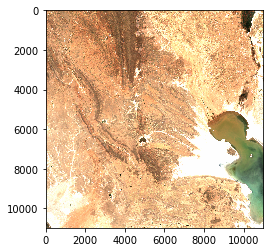

In [41]:
plt.imshow(image)